In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [3]:
os.getcwd()

'C:\\Users\\IN0202'

In [4]:
os.chdir(r"D:\Personal\Analytics course\IPBA\Case Study\hundred")
path=r"D:\Personal\Analytics course\IPBA\Case Study\hundred"

In [5]:
os.getcwd()

'D:\\Personal\\Analytics course\\IPBA\\Case Study\\hundred'

In [6]:
from os import listdir
filepaths = [f for f in listdir(path) if f.startswith('Stock')]
print(filepaths)

['Stock_ABBOTINDIA.xlsx', 'Stock_ACC.xlsx', 'Stock_ADANIPORTS.xlsx', 'Stock_ADANITRANS.xlsx', 'Stock_AMBUJACEM.xlsx', 'Stock_ASIANPAINT.xlsx', 'Stock_AUROPHARMA.xlsx', 'Stock_AXISBANK.xlsx', 'Stock_BAJAJ-AUTO.xlsx', 'Stock_BAJAJFINSV.xlsx', 'Stock_BAJAJHLDNG.xlsx', 'Stock_BAJFINANCE.xlsx', 'Stock_BANDHANBNK.xlsx', 'Stock_BANKBARODA.xlsx', 'Stock_BERGEPAINT.xlsx', 'Stock_BHARTIARTL.xlsx', 'Stock_BIOCON.xlsx', 'Stock_BOSCHLTD.xlsx', 'Stock_BPCL.xlsx', 'Stock_BRITANNIA.xlsx', 'Stock_CADILAHC.xlsx', 'Stock_CIPLA.xlsx', 'Stock_COALINDIA.xlsx', 'Stock_COLPAL.xlsx', 'Stock_CONCOR.xlsx', 'Stock_DABUR.xlsx', 'Stock_DIVISLAB.xlsx', 'Stock_DLF.xlsx', 'Stock_DMART.xlsx', 'Stock_DRREDDY.xlsx', 'Stock_EICHERMOT.xlsx', 'Stock_GAIL.xlsx', 'Stock_GICRE.xlsx', 'Stock_GODREJCP.xlsx', 'Stock_GRASIM.xlsx', 'Stock_HAVELLS.xlsx', 'Stock_HCLTECH.xlsx', 'Stock_HDFC.xlsx', 'Stock_HDFCAMC.xlsx', 'Stock_HDFCBANK.xlsx', 'Stock_HDFCLIFE.xlsx', 'Stock_HEROMOTOCO.xlsx', 'Stock_HINDALCO.xlsx', 'Stock_HINDPETRO.xlsx', 

In [7]:
# Read the data from each excel and store all of them into raw_data
raw_data= pd.concat(map(pd.read_excel, filepaths))

In [8]:
raw_data.head(10)
raw_data.tail(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2661,2020-09-18,ZEEL,EQ,221.10,223.40,226.65,219.20,219.75,220.30,223.08,24883313,5.551078e+14,132427.0,3851022,0.1548
2662,2020-09-21,ZEEL,EQ,220.30,221.75,224.80,204.35,210.50,210.70,215.91,29829634,6.440420e+14,206994.0,4525180,0.1517
2663,2020-09-22,ZEEL,EQ,210.70,212.35,212.35,193.35,196.70,197.10,200.46,54161525,1.085714e+15,261401.0,9690771,0.1789
2664,2020-09-23,ZEEL,EQ,197.10,200.10,203.05,177.40,190.70,191.80,189.96,65002964,1.234826e+15,348096.0,8663237,0.1333
2665,2020-09-24,ZEEL,EQ,191.80,185.00,195.80,182.85,193.50,190.35,190.14,76316695,1.451102e+15,279397.0,24361908,0.3192
2666,2020-09-25,ZEEL,EQ,190.35,197.55,201.50,183.20,197.30,198.20,192.54,61557172,1.185250e+15,301334.0,6573633,0.1068
2667,2020-09-28,ZEEL,EQ,198.20,198.75,209.75,197.20,207.60,208.75,205.11,34075363,6.989202e+14,171300.0,4578621,0.1344
2668,2020-09-29,ZEEL,EQ,208.75,210.00,214.60,204.30,208.55,207.80,209.57,45045743,9.440054e+14,197076.0,6072005,0.1348
2669,2020-09-30,ZEEL,EQ,207.80,209.00,213.00,206.15,210.00,208.90,209.94,31203625,6.550914e+14,134228.0,8507629,0.2726
2670,2020-10-01,ZEEL,EQ,208.90,211.00,215.00,210.50,214.70,214.00,213.33,19070023,4.068192e+14,95790.0,2804067,0.1470


In [9]:
raw_data.shape

(244901, 15)

In [10]:
raw_data.isnull().sum()

Date                      0
Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                30684
Deliverable Volume        0
%Deliverble               0
dtype: int64

In [11]:
# to calculate the simple moving average - 5, 10 , 50, 100, 200 days
raw_data['SMA-5'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.rolling(window=5).mean())
raw_data['SMA-10'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.rolling(window=10).mean())
raw_data['SMA-50'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.rolling(window=50).mean())
raw_data['SMA-100'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.rolling(window=100).mean())
raw_data['SMA-200'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.rolling(window=200).mean())

In [12]:
# to calculate the exponential moving average - 5, 10 , 50, 100, 200 days
raw_data['EMA-5'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.ewm(span=5).mean())
raw_data['EMA-10'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.ewm(span=10).mean())
raw_data['EMA-50'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.ewm(span=50).mean())
raw_data['EMA-100'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.ewm(span=100).mean())
raw_data['EMA-200'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.ewm(span=200).mean())

In [74]:
# calculcate RSI - Relative strength index
change = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.diff())
gain = change.mask(change < 0, 0)
loss = change.mask (change > 0, 0)
average_gain= gain.rolling(window = 14).mean().shift()
average_loss= loss.rolling(window = 14).mean().shift()
relativestrength = abs(average_gain / average_loss)
rsi = 100 - (100/(1+relativestrength))
raw_data['rsi'] = rsi.shift(-1) # move up since the current column is already on next row due to rolling function
raw_data['rsi'].head(25)

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
13          NaN
14    22.944483
15    34.261242
16    44.068820
17    54.041570
18    46.383133
19    35.623497
20    33.732057
21    39.097999
22    50.014903
23    51.551459
24    55.937413
Name: rsi, dtype: float64

In [82]:
# calculate MACD
# MACD = 26-day EMA - 12-day EMA
raw_data['ema12'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.ewm(span=12).mean())
raw_data['ema26'] = raw_data.groupby('Symbol')['Close'].transform(lambda x:x.ewm(span=26).mean())
raw_data['macd'] = raw_data['ema12'] - raw_data['ema26']
raw_data['macd'].head(30)

0      0.000000
1     -0.049359
2     -0.521840
3     -1.554351
4     -1.362439
5     -0.710475
6     -0.166872
7     -0.139739
8     -0.414025
9     -0.934808
10    -1.298024
11    -2.991341
12    -4.283728
13    -5.189665
14    -7.138881
15    -7.112037
16    -5.951267
17    -4.428102
18    -3.466686
19    -3.984271
20    -4.551437
21    -4.379577
22    -2.410999
23    -0.953273
24     1.317506
25     1.960331
26     2.668643
27     4.258826
28    10.312249
29    14.544195
Name: macd, dtype: float64

0       NaN
1     -2.20
2    -14.80
3    -23.00
4     18.10
5     11.95
6      2.50
7     -7.15
8     -5.95
9     -6.45
10     0.00
11   -26.30
12    -1.35
13     0.10
14   -22.45
15    23.35
16    17.00
17     8.90
18    -4.10
19   -19.95
20    -3.25
21     8.30
22    26.25
23    -1.45
24    16.20
Name: Close, dtype: float64

In [83]:
raw_data.to_csv('Calculated KPIs.csv')

In [76]:
raw_data.isnull().sum()

Date                      0
Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                30684
Deliverable Volume        0
%Deliverble               0
SMA-5                   424
SMA-10                  954
SMA-50                 5194
SMA-100               10494
SMA-200               21020
EMA-5                     0
EMA-10                    0
EMA-50                    0
EMA-100                   0
EMA-200                   0
rsi                    1485
dtype: int64

In [77]:
raw_data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,SMA-10,SMA-50,SMA-100,SMA-200,EMA-5,EMA-10,EMA-50,EMA-100,EMA-200,rsi
0,2010-01-08,ABBOTINDIA,EQ,783.75,755.00,807.00,755.00,807.00,807.00,784.12,...,NaN,NaN,NaN,NaN,807.000000,807.000000,807.000000,807.000000,807.000000,NaN
1,2010-01-11,ABBOTINDIA,EQ,807.00,825.00,825.00,790.00,804.80,804.80,793.90,...,NaN,NaN,NaN,NaN,805.680000,805.790000,805.878000,805.889000,805.894500,NaN
2,2010-01-12,ABBOTINDIA,EQ,804.80,800.00,805.00,790.00,790.00,790.00,799.36,...,NaN,NaN,NaN,NaN,798.252632,799.442525,800.372244,800.486390,800.543264,NaN
3,2010-01-13,ABBOTINDIA,EQ,790.00,787.00,787.00,720.00,767.00,767.00,758.53,...,NaN,NaN,NaN,NaN,785.270769,788.754158,791.522061,791.861988,792.031243,NaN
4,2010-01-14,ABBOTINDIA,EQ,767.00,769.00,798.00,769.00,785.10,785.10,791.73,...,NaN,NaN,NaN,NaN,785.205213,787.705149,790.132883,790.454959,790.617132,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,2020-09-25,ZEEL,EQ,190.35,197.55,201.50,183.20,197.30,198.20,192.54,...,207.905,184.363,178.3200,199.09725,198.979075,204.265870,193.784020,188.921231,209.342376,32.423208
2667,2020-09-28,ZEEL,EQ,198.20,198.75,209.75,197.20,207.60,208.75,205.11,...,207.160,185.443,178.9010,198.72375,202.236050,205.081167,194.370921,189.313880,209.336481,46.603261
2668,2020-09-29,ZEEL,EQ,208.75,210.00,214.60,204.30,208.55,207.80,209.57,...,206.195,186.524,179.4250,198.34125,204.090700,205.575500,194.897552,189.679942,209.321193,39.700375
2669,2020-09-30,ZEEL,EQ,207.80,209.00,213.00,206.15,210.00,208.90,209.94,...,205.500,187.562,179.9635,197.98725,205.693800,206.179954,195.446667,190.060537,209.317002,39.245283


In [78]:
AbbotIndia = raw_data[raw_data.Symbol == "ABBOTINDIA"]
print(AbbotIndia)

           Date      Symbol Series  Prev Close      Open      High       Low  \
0    2010-01-08  ABBOTINDIA     EQ      783.75    755.00    807.00    755.00   
1    2010-01-11  ABBOTINDIA     EQ      807.00    825.00    825.00    790.00   
2    2010-01-12  ABBOTINDIA     EQ      804.80    800.00    805.00    790.00   
3    2010-01-13  ABBOTINDIA     EQ      790.00    787.00    787.00    720.00   
4    2010-01-14  ABBOTINDIA     EQ      767.00    769.00    798.00    769.00   
...         ...         ...    ...         ...       ...       ...       ...   
2662 2020-09-25  ABBOTINDIA     EQ    15982.90  15950.00  16441.00  15950.00   
2663 2020-09-28  ABBOTINDIA     EQ    16237.75  16315.15  16499.95  16168.00   
2664 2020-09-29  ABBOTINDIA     EQ    16318.20  16443.65  16510.10  16111.60   
2665 2020-09-30  ABBOTINDIA     EQ    16402.00  16365.00  16500.00  16235.35   
2666 2020-10-01  ABBOTINDIA     EQ    16486.95  16470.00  16595.00  16325.00   

          Last     Close      VWAP  ...

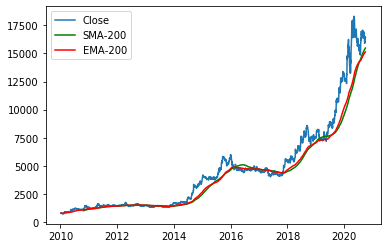

In [17]:
plt.plot(AbbotIndia.Date, AbbotIndia['Close'], label='Close')
plt.plot(AbbotIndia.Date, AbbotIndia['SMA-200'], label='SMA-200', color='green')
plt.plot(AbbotIndia.Date, AbbotIndia['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

In [18]:
from datetime import datetime
mydate = AbbotIndia['Date'].dt.year
print(mydate)
AbbotIndia[mydate == 2020]

0       2010
1       2010
2       2010
3       2010
4       2010
        ... 
2662    2020
2663    2020
2664    2020
2665    2020
2666    2020
Name: Date, Length: 2667, dtype: int64


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,SMA-5,SMA-10,SMA-50,SMA-100,SMA-200,EMA-5,EMA-10,EMA-50,EMA-100,EMA-200
2477,2020-01-01,ABBOTINDIA,EQ,13075.50,13170.60,13452.15,13080.00,13119.95,13140.00,13199.96,...,13137.31,13130.705,12425.379,11134.0735,9539.43600,13129.490574,13102.354717,12369.220211,11405.786264,10170.908695
2478,2020-01-02,ABBOTINDIA,EQ,13140.00,13119.95,13314.90,13119.95,13127.00,13139.90,13194.30,...,13149.28,13125.605,12474.180,11180.4795,9568.73225,13132.960383,13109.181132,12399.442947,11440.125150,10200.450897
2479,2020-01-03,ABBOTINDIA,EQ,13139.90,13170.00,13274.20,13150.00,13190.00,13248.25,13211.40,...,13160.08,13126.415,12520.860,11229.1910,9598.15425,13171.390255,13134.466381,12432.729498,11475.929602,10230.777256
2480,2020-01-06,ABBOTINDIA,EQ,13248.25,13230.40,13230.40,12720.00,12887.90,12780.30,12928.33,...,13076.79,13105.980,12554.225,11272.6085,9625.07050,13041.026837,13070.072493,12446.359714,11501.758719,10256.145641
2481,2020-01-07,ABBOTINDIA,EQ,12780.30,12881.10,13074.95,12657.00,12749.85,12742.90,12806.95,...,13010.27,13061.395,12580.938,11314.3050,9652.00775,12941.651225,13010.586585,12457.988745,11526.335774,10280.889466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,2020-09-25,ABBOTINDIA,EQ,15982.90,15950.00,16441.00,15950.00,16180.00,16237.75,16179.05,...,16008.45,16292.655,16243.973,16279.0280,15405.09975,16133.739318,16238.664865,16317.747762,16069.109451,15072.847257
2663,2020-09-28,ABBOTINDIA,EQ,16237.75,16315.15,16499.95,16168.00,16350.00,16318.20,16380.04,...,16094.06,16272.860,16265.701,16265.1625,15423.91875,16195.226212,16253.125799,16317.765497,16074.041937,15085.238827
2664,2020-09-29,ABBOTINDIA,EQ,16318.20,16443.65,16510.10,16111.60,16315.25,16402.00,16353.03,...,16185.84,16223.500,16293.445,16250.1045,15441.90450,16264.150808,16280.193835,16321.068810,16080.536156,15098.340928
2665,2020-09-30,ABBOTINDIA,EQ,16402.00,16365.00,16500.00,16235.35,16498.00,16486.95,16444.31,...,16285.56,16219.685,16324.435,16234.1550,15459.42850,16338.417205,16317.785865,16327.573955,16088.583955,15112.157934


In [19]:
leadingchar = "Stock_"
trailingchar = ".xlsx"
stocklist = np.char.strip(filepaths,leadingchar)
stocklist = np.char.strip(stocklist,trailingchar)
print(stocklist)

['ABBOTINDIA' 'ACC' 'ADANIPORTS' 'ADANITRANS' 'AMBUJACEM' 'ASIANPAINT'
 'AUROPHARMA' 'AXISBANK' 'BAJAJ-AUTO' 'BAJAJFINSV' 'BAJAJHLDNG'
 'BAJFINANCE' 'BANDHANBNK' 'BANKBARODA' 'BERGEPAINT' 'BHARTIARTL' 'BIOCON'
 'BOSCHLTD' 'BPCL' 'BRITANNIA' 'CADILAHC' 'CIPLA' 'COALINDIA' 'COLPAL'
 'CONCOR' 'DABUR' 'DIVISLAB' 'DLF' 'DMART' 'DRREDDY' 'EICHERMOT' 'GAIL'
 'GICRE' 'GODREJCP' 'GRASIM' 'HAVELLS' 'HCLTECH' 'HDFC' 'HDFCAMC'
 'HDFCBANK' 'HDFCLIFE' 'HEROMOTOCO' 'HINDALCO' 'HINDPETRO' 'HINDUNILVR'
 'HINDZINC' 'ICICIBANK' 'ICICIGI' 'ICICIPRULI' 'IGL' 'INDIGO' 'INDUSINDBK'
 'INFRATEL' 'INFY' 'IOC' 'ITC' 'JSWSTEEL' 'KOTAKBANK' 'LT' 'LUPIN' 'M&M'
 'MARICO' 'MARUTI' 'MCDOWELL-N' 'MOTHERSUMI' 'MUTHOOTFIN' 'NAUKRI'
 'NESTLEIND' 'NHPC' 'NMDC' 'NTPC' 'OFSS' 'ONGC' 'PAGEIND' 'PEL' 'PETRONET'
 'PFC' 'PGHH' 'PIDILITIND' 'PNB' 'POWERGRID' 'RELIANCE' 'BICARD' 'BILIFE'
 'BIN' 'HREECEM' 'IEMENS' 'RTRANSFIN' 'UNPHARMA' 'TATAMOTORS' 'TATASTEEL'
 'TCS' 'TECHM' 'TITAN' 'TORNTPHARM' 'UBL' 'ULTRACEMCO' 'UPL' 'WIPRO'
 '

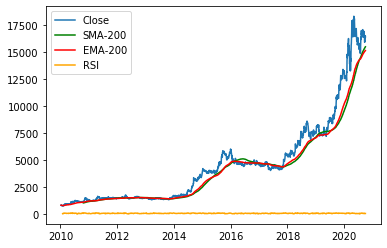

In [79]:
#for i in stocklist:
#    print(i)
#    raw_data[raw_data.Symbol == stocklist[i]]
#stock(i) = raw_data[raw_data.Symbol == stocklist[1]]
AbbotIndia = raw_data[raw_data.Symbol == "ABBOTINDIA"]
plt.plot(AbbotIndia.Date, AbbotIndia['Close'], label='Close')
plt.plot(AbbotIndia.Date, AbbotIndia['SMA-200'], label='SMA-200', color='green')
plt.plot(AbbotIndia.Date, AbbotIndia['EMA-200'], label='EMA-200', color='red')
plt.plot(AbbotIndia.Date, AbbotIndia['rsi'], label='RSI', color='orange')
plt.legend(loc='upper left')
plt.show()

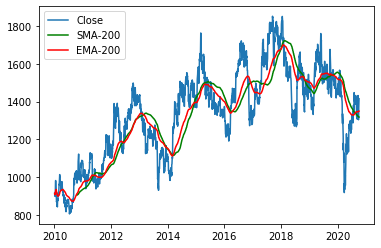

In [33]:
Acc = raw_data[raw_data.Symbol == "ACC"]
plt.plot(Acc.Date, Acc['Close'], label='Close')
plt.plot(Acc.Date, Acc['SMA-200'], label='SMA-200', color='green')
plt.plot(Acc.Date, Acc['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

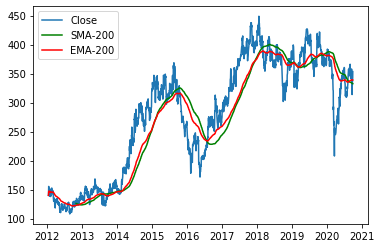

In [34]:
Adaniports = raw_data[raw_data.Symbol == "ADANIPORTS"]
plt.plot(Adaniports.Date, Adaniports['Close'], label='Close')
plt.plot(Adaniports.Date, Adaniports['SMA-200'], label='SMA-200', color='green')
plt.plot(Adaniports.Date, Adaniports['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

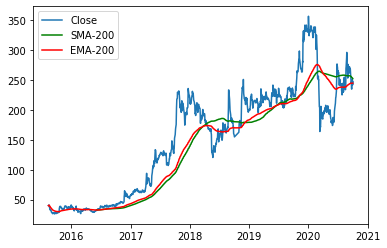

In [35]:
Adanitrans = raw_data[raw_data.Symbol == "ADANITRANS"]
plt.plot(Adanitrans.Date, Adanitrans['Close'], label='Close')
plt.plot(Adanitrans.Date, Adanitrans['SMA-200'], label='SMA-200', color='green')
plt.plot(Adanitrans.Date, Adanitrans['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

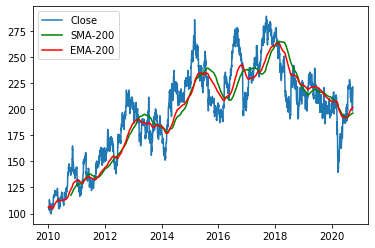

In [36]:
Ambujacem = raw_data[raw_data.Symbol == "AMBUJACEM"]
plt.plot(Ambujacem.Date, Ambujacem['Close'], label='Close')
plt.plot(Ambujacem.Date, Ambujacem['SMA-200'], label='SMA-200', color='green')
plt.plot(Ambujacem.Date, Ambujacem['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

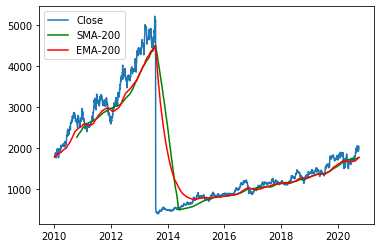

In [37]:
Asianpaint = raw_data[raw_data.Symbol == "ASIANPAINT"]
plt.plot(Asianpaint.Date, Asianpaint['Close'], label='Close')
plt.plot(Asianpaint.Date, Asianpaint['SMA-200'], label='SMA-200', color='green')
plt.plot(Asianpaint.Date, Asianpaint['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

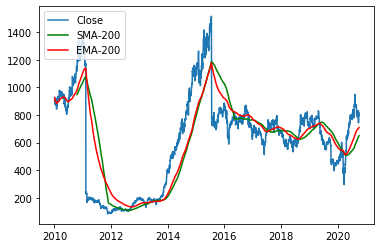

In [38]:
Auropharma = raw_data[raw_data.Symbol == "AUROPHARMA"]
plt.plot(Auropharma.Date, Auropharma['Close'], label='Close')
plt.plot(Auropharma.Date, Auropharma['SMA-200'], label='SMA-200', color='green')
plt.plot(Auropharma.Date, Auropharma['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

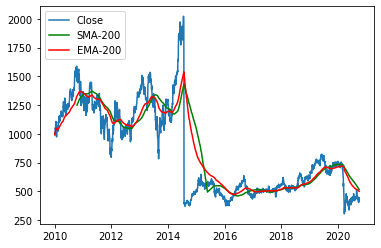

In [39]:
Axisbank = raw_data[raw_data.Symbol == "AXISBANK"]
plt.plot(Axisbank.Date, Axisbank['Close'], label='Close')
plt.plot(Axisbank.Date, Axisbank['SMA-200'], label='SMA-200', color='green')
plt.plot(Axisbank.Date, Axisbank['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

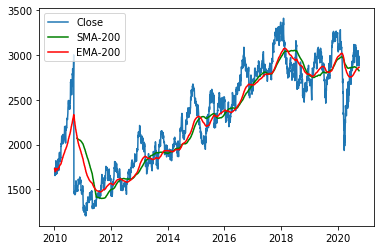

In [41]:
BajajAuto = raw_data[raw_data.Symbol == "BAJAJ-AUTO"]
plt.plot(BajajAuto.Date, BajajAuto['Close'], label='Close')
plt.plot(BajajAuto.Date, BajajAuto['SMA-200'], label='SMA-200', color='green')
plt.plot(BajajAuto.Date, BajajAuto['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

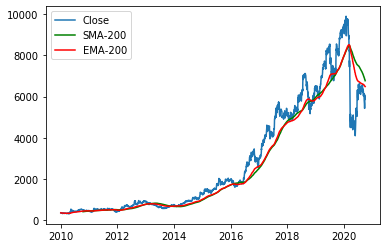

In [42]:
Bajajfinsv = raw_data[raw_data.Symbol == "BAJAJFINSV"]
plt.plot(Bajajfinsv.Date, Bajajfinsv['Close'], label='Close')
plt.plot(Bajajfinsv.Date, Bajajfinsv['SMA-200'], label='SMA-200', color='green')
plt.plot(Bajajfinsv.Date, Bajajfinsv['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

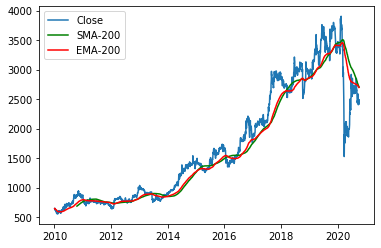

In [43]:
Bajajhldng = raw_data[raw_data.Symbol == "BAJAJHLDNG"]
plt.plot(Bajajhldng.Date, Bajajhldng['Close'], label='Close')
plt.plot(Bajajhldng.Date, Bajajhldng['SMA-200'], label='SMA-200', color='green')
plt.plot(Bajajhldng.Date, Bajajhldng['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

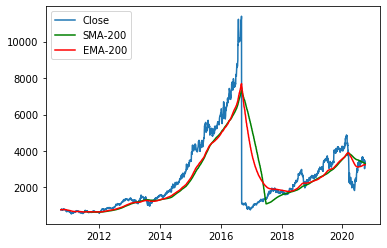

In [44]:
BajFinance = raw_data[raw_data.Symbol == "BAJFINANCE"]
plt.plot(BajFinance.Date, BajFinance['Close'], label='Close')
plt.plot(BajFinance.Date, BajFinance['SMA-200'], label='SMA-200', color='green')
plt.plot(BajFinance.Date, BajFinance['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

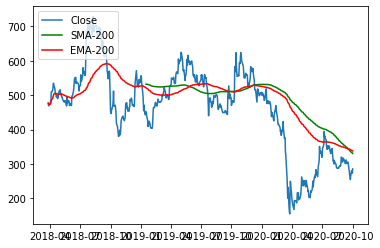

In [45]:
BandhanBnk = raw_data[raw_data.Symbol == "BANDHANBNK"]
plt.plot(BandhanBnk.Date, BandhanBnk['Close'], label='Close')
plt.plot(BandhanBnk.Date, BandhanBnk['SMA-200'], label='SMA-200', color='green')
plt.plot(BandhanBnk.Date, BandhanBnk['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

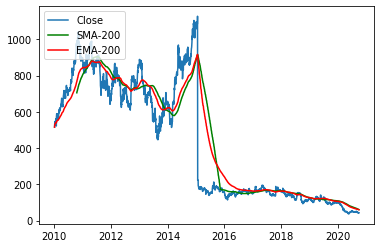

In [46]:
BankBaroda = raw_data[raw_data.Symbol == "BANKBARODA"]
plt.plot(BankBaroda.Date, BankBaroda['Close'], label='Close')
plt.plot(BankBaroda.Date, BankBaroda['SMA-200'], label='SMA-200', color='green')
plt.plot(BankBaroda.Date, BankBaroda['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

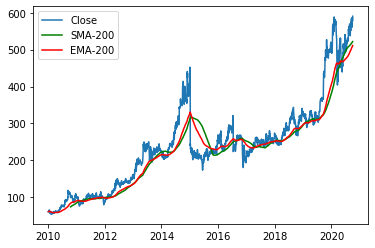

In [47]:
BergePaint = raw_data[raw_data.Symbol == "BERGEPAINT"]
plt.plot(BergePaint.Date, BergePaint['Close'], label='Close')
plt.plot(BergePaint.Date, BergePaint['SMA-200'], label='SMA-200', color='green')
plt.plot(BergePaint.Date, BergePaint['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

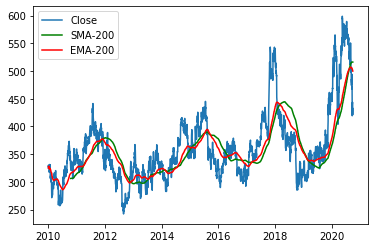

In [48]:
BhartiArtl = raw_data[raw_data.Symbol == "BHARTIARTL"]
plt.plot(BhartiArtl.Date, BhartiArtl['Close'], label='Close')
plt.plot(BhartiArtl.Date, BhartiArtl['SMA-200'], label='SMA-200', color='green')
plt.plot(BhartiArtl.Date, BhartiArtl['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

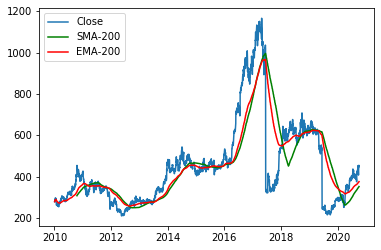

In [49]:
Biocon = raw_data[raw_data.Symbol == "BIOCON"]
plt.plot(Biocon.Date, Biocon['Close'], label='Close')
plt.plot(Biocon.Date, Biocon['SMA-200'], label='SMA-200', color='green')
plt.plot(Biocon.Date, Biocon['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

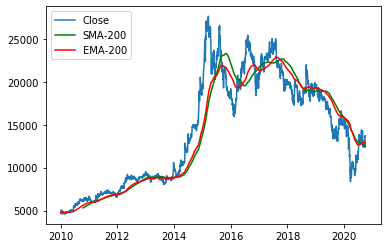

In [50]:
BoschLtd = raw_data[raw_data.Symbol == "BOSCHLTD"]
plt.plot(BoschLtd.Date, BoschLtd['Close'], label='Close')
plt.plot(BoschLtd.Date, BoschLtd['SMA-200'], label='SMA-200', color='green')
plt.plot(BoschLtd.Date, BoschLtd['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

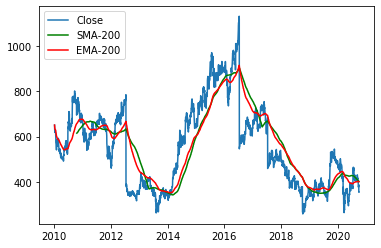

In [51]:
Bpcl = raw_data[raw_data.Symbol == "BPCL"]
plt.plot(Bpcl.Date, Bpcl['Close'], label='Close')
plt.plot(Bpcl.Date, Bpcl['SMA-200'], label='SMA-200', color='green')
plt.plot(Bpcl.Date, Bpcl['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

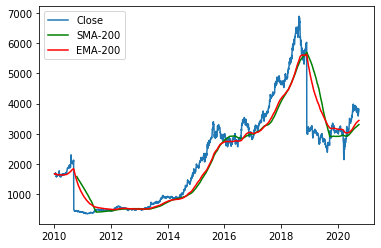

In [52]:
Britannia = raw_data[raw_data.Symbol == "BRITANNIA"]
plt.plot(Britannia.Date, Britannia['Close'], label='Close')
plt.plot(Britannia.Date, Britannia['SMA-200'], label='SMA-200', color='green')
plt.plot(Britannia.Date, Britannia['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

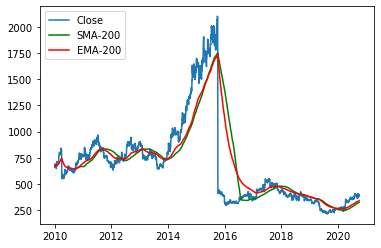

In [53]:
Cadilahc = raw_data[raw_data.Symbol == "CADILAHC"]
plt.plot(Cadilahc.Date, Cadilahc['Close'], label='Close')
plt.plot(Cadilahc.Date, Cadilahc['SMA-200'], label='SMA-200', color='green')
plt.plot(Cadilahc.Date, Cadilahc['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

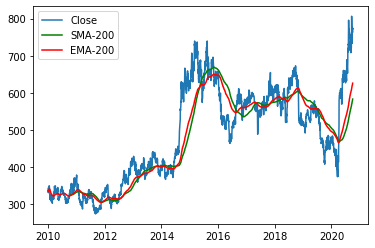

In [54]:
Cipla = raw_data[raw_data.Symbol == "CIPLA"]
plt.plot(Cipla.Date, Cipla['Close'], label='Close')
plt.plot(Cipla.Date, Cipla['SMA-200'], label='SMA-200', color='green')
plt.plot(Cipla.Date, Cipla['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

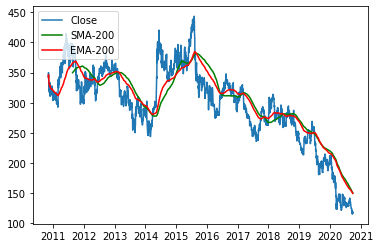

In [55]:
CoalIndia = raw_data[raw_data.Symbol == "COALINDIA"]
plt.plot(CoalIndia.Date, CoalIndia['Close'], label='Close')
plt.plot(CoalIndia.Date, CoalIndia['SMA-200'], label='SMA-200', color='green')
plt.plot(CoalIndia.Date, CoalIndia['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

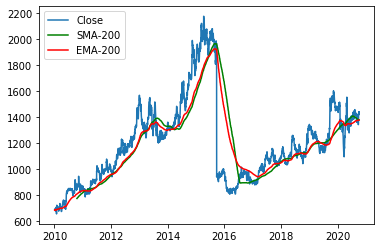

In [56]:
Colpal = raw_data[raw_data.Symbol == "COLPAL"]
plt.plot(Colpal.Date, Colpal['Close'], label='Close')
plt.plot(Colpal.Date, Colpal['SMA-200'], label='SMA-200', color='green')
plt.plot(Colpal.Date, Colpal['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

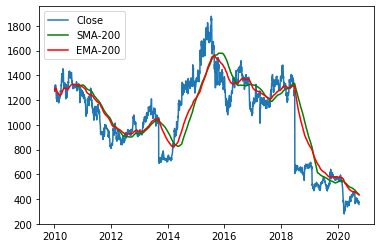

In [57]:
Concor = raw_data[raw_data.Symbol == "CONCOR"]
plt.plot(Concor.Date, Concor['Close'], label='Close')
plt.plot(Concor.Date, Concor['SMA-200'], label='SMA-200', color='green')
plt.plot(Concor.Date, Concor['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

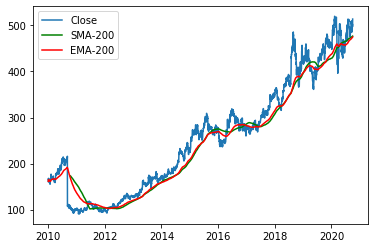

In [58]:
Dabur = raw_data[raw_data.Symbol == "DABUR"]
plt.plot(Dabur.Date, Dabur['Close'], label='Close')
plt.plot(Dabur.Date, Dabur['SMA-200'], label='SMA-200', color='green')
plt.plot(Dabur.Date, Dabur['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

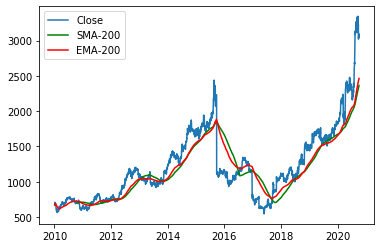

In [59]:
DivisLab = raw_data[raw_data.Symbol == "DIVISLAB"]
plt.plot(DivisLab.Date, DivisLab['Close'], label='Close')
plt.plot(DivisLab.Date, DivisLab['SMA-200'], label='SMA-200', color='green')
plt.plot(DivisLab.Date, DivisLab['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

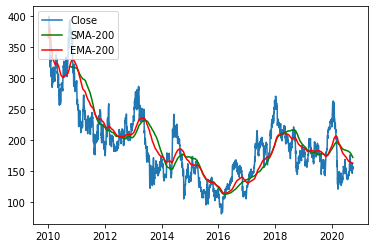

In [60]:
Dlf = raw_data[raw_data.Symbol == "DLF"]
plt.plot(Dlf.Date, Dlf['Close'], label='Close')
plt.plot(Dlf.Date, Dlf['SMA-200'], label='SMA-200', color='green')
plt.plot(Dlf.Date, Dlf['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

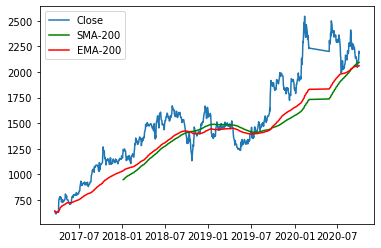

In [61]:
Dmart = raw_data[raw_data.Symbol == "DMART"]
plt.plot(Dmart.Date, Dmart['Close'], label='Close')
plt.plot(Dmart.Date, Dmart['SMA-200'], label='SMA-200', color='green')
plt.plot(Dmart.Date, Dmart['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

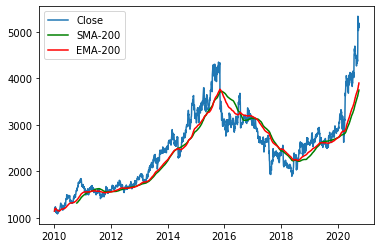

In [62]:
DrReddy = raw_data[raw_data.Symbol == "DRREDDY"]
plt.plot(DrReddy.Date, DrReddy['Close'], label='Close')
plt.plot(DrReddy.Date, DrReddy['SMA-200'], label='SMA-200', color='green')
plt.plot(DrReddy.Date, DrReddy['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

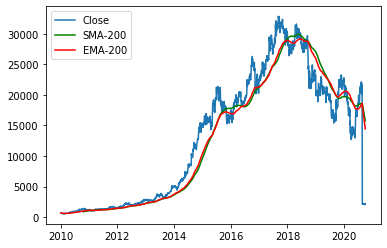

In [63]:
EicherMot = raw_data[raw_data.Symbol == "EICHERMOT"]
plt.plot(EicherMot.Date, EicherMot['Close'], label='Close')
plt.plot(EicherMot.Date, EicherMot['SMA-200'], label='SMA-200', color='green')
plt.plot(EicherMot.Date, EicherMot['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

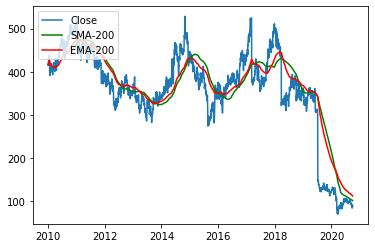

In [64]:
Gail = raw_data[raw_data.Symbol == "GAIL"]
plt.plot(Gail.Date, Gail['Close'], label='Close')
plt.plot(Gail.Date, Gail['SMA-200'], label='SMA-200', color='green')
plt.plot(Gail.Date, Gail['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

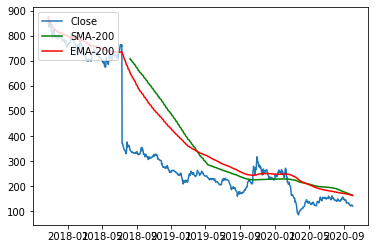

In [65]:
Gicre = raw_data[raw_data.Symbol == "GICRE"]
plt.plot(Gicre.Date, Gicre['Close'], label='Close')
plt.plot(Gicre.Date, Gicre['SMA-200'], label='SMA-200', color='green')
plt.plot(Gicre.Date, Gicre['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

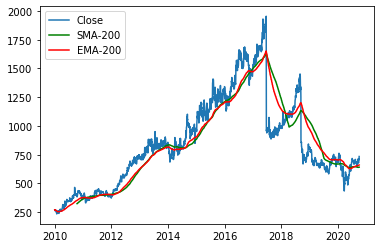

In [66]:
GodrejCp = raw_data[raw_data.Symbol == "GODREJCP"]
plt.plot(GodrejCp.Date, GodrejCp['Close'], label='Close')
plt.plot(GodrejCp.Date, GodrejCp['SMA-200'], label='SMA-200', color='green')
plt.plot(GodrejCp.Date, GodrejCp['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

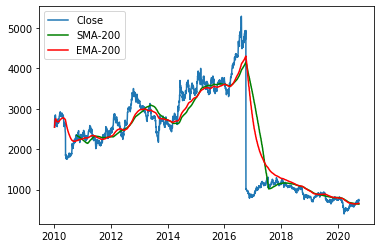

In [67]:
Grasim = raw_data[raw_data.Symbol == "GRASIM"]
plt.plot(Grasim.Date, Grasim['Close'], label='Close')
plt.plot(Grasim.Date, Grasim['SMA-200'], label='SMA-200', color='green')
plt.plot(Grasim.Date, Grasim['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

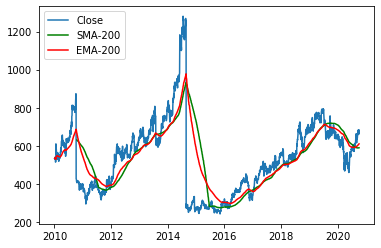

In [68]:
Havells = raw_data[raw_data.Symbol == "HAVELLS"]
plt.plot(Havells.Date, Havells['Close'], label='Close')
plt.plot(Havells.Date, Havells['SMA-200'], label='SMA-200', color='green')
plt.plot(Havells.Date, Havells['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

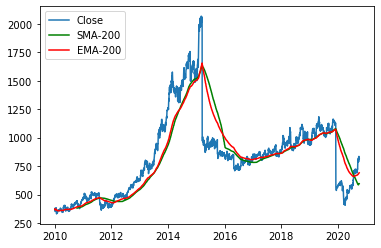

In [69]:
HclTech = raw_data[raw_data.Symbol == "HCLTECH"]
plt.plot(HclTech.Date, HclTech['Close'], label='Close')
plt.plot(HclTech.Date, HclTech['SMA-200'], label='SMA-200', color='green')
plt.plot(HclTech.Date, HclTech['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

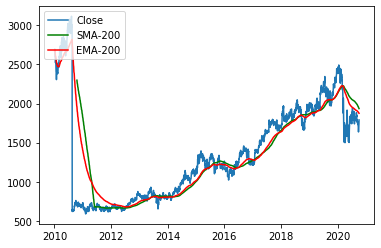

In [70]:
Hdfc = raw_data[raw_data.Symbol == "HDFC"]
plt.plot(Hdfc.Date, Hdfc['Close'], label='Close')
plt.plot(Hdfc.Date, Hdfc['SMA-200'], label='SMA-200', color='green')
plt.plot(Hdfc.Date, Hdfc['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

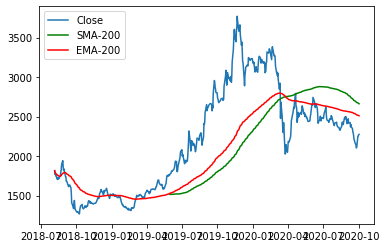

In [71]:
HdfcAmc = raw_data[raw_data.Symbol == "HDFCAMC"]
plt.plot(HdfcAmc.Date, HdfcAmc['Close'], label='Close')
plt.plot(HdfcAmc.Date, HdfcAmc['SMA-200'], label='SMA-200', color='green')
plt.plot(HdfcAmc.Date, HdfcAmc['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

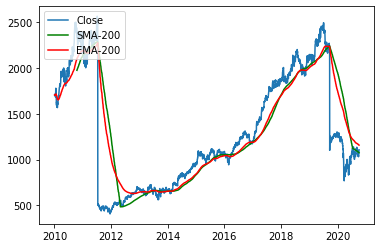

In [72]:
HdfcBank = raw_data[raw_data.Symbol == "HDFCBANK"]
plt.plot(HdfcBank.Date, HdfcBank['Close'], label='Close')
plt.plot(HdfcBank.Date, HdfcBank['SMA-200'], label='SMA-200', color='green')
plt.plot(HdfcBank.Date, HdfcBank['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

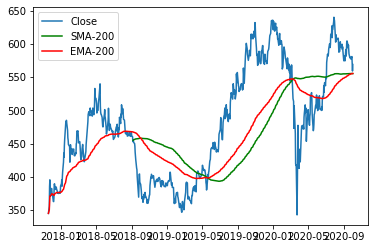

In [73]:
HdfcLife = raw_data[raw_data.Symbol == "HDFCLIFE"]
plt.plot(HdfcLife.Date, HdfcLife['Close'], label='Close')
plt.plot(HdfcLife.Date, HdfcLife['SMA-200'], label='SMA-200', color='green')
plt.plot(HdfcLife.Date, HdfcLife['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

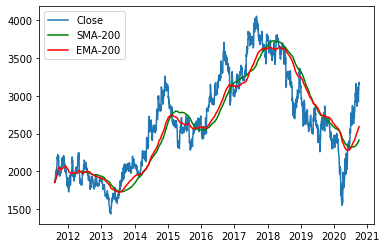

In [74]:
HeroMotoCo = raw_data[raw_data.Symbol == "HEROMOTOCO"]
plt.plot(HeroMotoCo.Date, HeroMotoCo['Close'], label='Close')
plt.plot(HeroMotoCo.Date, HeroMotoCo['SMA-200'], label='SMA-200', color='green')
plt.plot(HeroMotoCo.Date, HeroMotoCo['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

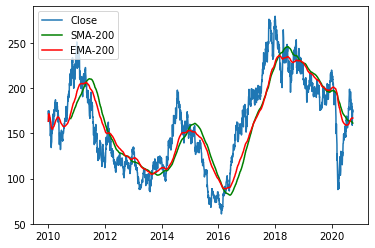

In [75]:
HindalCo = raw_data[raw_data.Symbol == "HINDALCO"]
plt.plot(HindalCo.Date, HindalCo['Close'], label='Close')
plt.plot(HindalCo.Date, HindalCo['SMA-200'], label='SMA-200', color='green')
plt.plot(HindalCo.Date, HindalCo['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

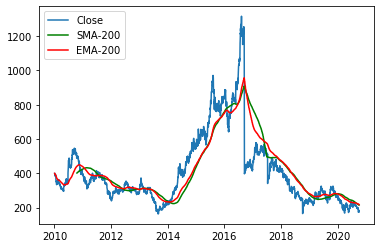

In [76]:
HindPetro = raw_data[raw_data.Symbol == "HINDPETRO"]
plt.plot(HindPetro.Date, HindPetro['Close'], label='Close')
plt.plot(HindPetro.Date, HindPetro['SMA-200'], label='SMA-200', color='green')
plt.plot(HindPetro.Date, HindPetro['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

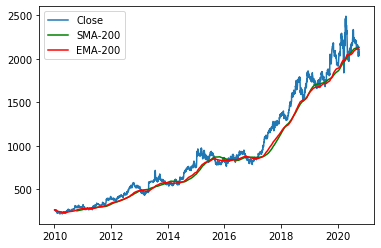

In [77]:
HindUnilvr = raw_data[raw_data.Symbol == "HINDUNILVR"]
plt.plot(HindUnilvr.Date, HindUnilvr['Close'], label='Close')
plt.plot(HindUnilvr.Date, HindUnilvr['SMA-200'], label='SMA-200', color='green')
plt.plot(HindUnilvr.Date, HindUnilvr['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

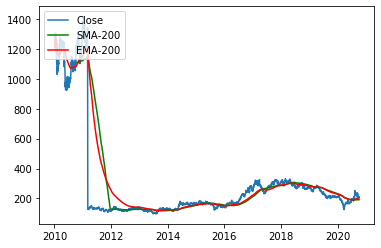

In [78]:
HindZinc = raw_data[raw_data.Symbol == "HINDZINC"]
plt.plot(HindZinc.Date, HindZinc['Close'], label='Close')
plt.plot(HindZinc.Date, HindZinc['SMA-200'], label='SMA-200', color='green')
plt.plot(HindZinc.Date, HindZinc['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

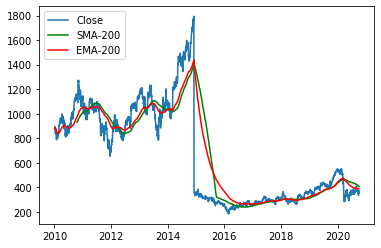

In [79]:
IciciBank = raw_data[raw_data.Symbol == "ICICIBANK"]
plt.plot(IciciBank.Date, IciciBank['Close'], label='Close')
plt.plot(IciciBank.Date, IciciBank['SMA-200'], label='SMA-200', color='green')
plt.plot(IciciBank.Date, IciciBank['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

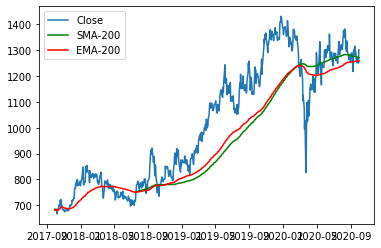

In [80]:
IciciGi = raw_data[raw_data.Symbol == "ICICIGI"]
plt.plot(IciciGi.Date, IciciGi['Close'], label='Close')
plt.plot(IciciGi.Date, IciciGi['SMA-200'], label='SMA-200', color='green')
plt.plot(IciciGi.Date, IciciGi['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

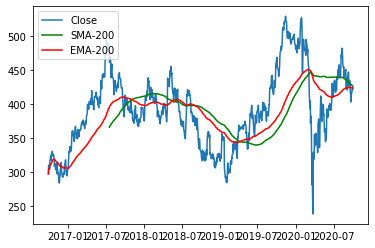

In [81]:
IciciPruLi = raw_data[raw_data.Symbol == "ICICIPRULI"]
plt.plot(IciciPruLi.Date, IciciPruLi['Close'], label='Close')
plt.plot(IciciPruLi.Date, IciciPruLi['SMA-200'], label='SMA-200', color='green')
plt.plot(IciciPruLi.Date, IciciPruLi['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

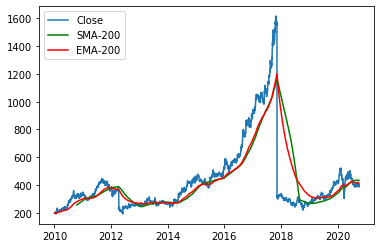

In [82]:
Igl = raw_data[raw_data.Symbol == "IGL"]
plt.plot(Igl.Date, Igl['Close'], label='Close')
plt.plot(Igl.Date, Igl['SMA-200'], label='SMA-200', color='green')
plt.plot(Igl.Date, Igl['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

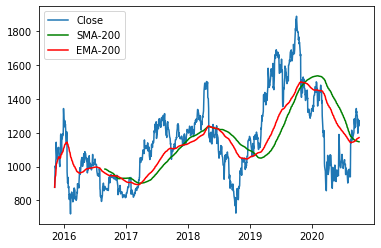

In [83]:
Indigo = raw_data[raw_data.Symbol == "INDIGO"]
plt.plot(Indigo.Date, Indigo['Close'], label='Close')
plt.plot(Indigo.Date, Indigo['SMA-200'], label='SMA-200', color='green')
plt.plot(Indigo.Date, Indigo['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

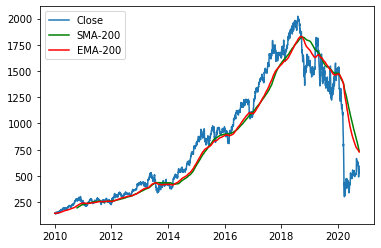

In [84]:
IndusIndBk = raw_data[raw_data.Symbol == "INDUSINDBK"]
plt.plot(IndusIndBk.Date, IndusIndBk['Close'], label='Close')
plt.plot(IndusIndBk.Date, IndusIndBk['SMA-200'], label='SMA-200', color='green')
plt.plot(IndusIndBk.Date, IndusIndBk['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

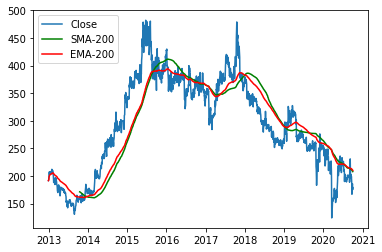

In [85]:
InfraTel = raw_data[raw_data.Symbol == "INFRATEL"]
plt.plot(InfraTel.Date, InfraTel['Close'], label='Close')
plt.plot(InfraTel.Date, InfraTel['SMA-200'], label='SMA-200', color='green')
plt.plot(InfraTel.Date, InfraTel['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

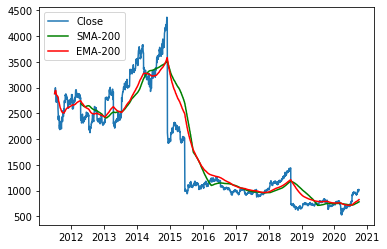

In [88]:
Infy = raw_data[raw_data.Symbol == "INFY"]
plt.plot(Infy.Date, Infy['Close'], label='Close')
plt.plot(Infy.Date, Infy['SMA-200'], label='SMA-200', color='green')
plt.plot(Infy.Date, Infy['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

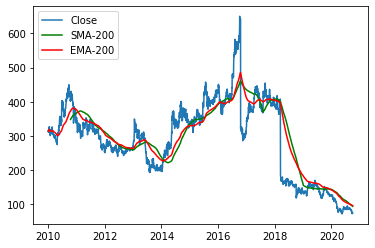

In [87]:
Ioc = raw_data[raw_data.Symbol == "IOC"]
plt.plot(Ioc.Date, Ioc['Close'], label='Close')
plt.plot(Ioc.Date, Ioc['SMA-200'], label='SMA-200', color='green')
plt.plot(Ioc.Date, Ioc['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

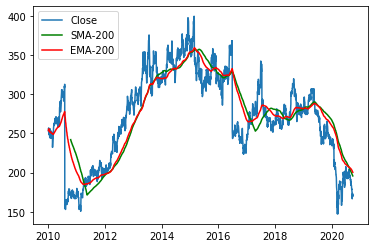

In [89]:
Itc = raw_data[raw_data.Symbol == "ITC"]
plt.plot(Itc.Date, Itc['Close'], label='Close')
plt.plot(Itc.Date, Itc['SMA-200'], label='SMA-200', color='green')
plt.plot(Itc.Date, Itc['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

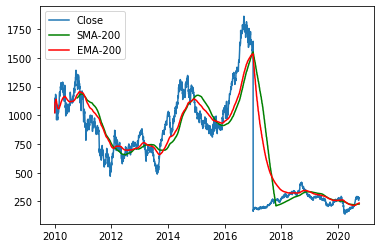

In [90]:
JswSteel = raw_data[raw_data.Symbol == "JSWSTEEL"]
plt.plot(JswSteel.Date, JswSteel['Close'], label='Close')
plt.plot(JswSteel.Date, JswSteel['SMA-200'], label='SMA-200', color='green')
plt.plot(JswSteel.Date, JswSteel['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

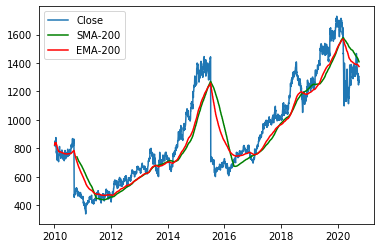

In [91]:
KotakBank = raw_data[raw_data.Symbol == "KOTAKBANK"]
plt.plot(KotakBank.Date, KotakBank['Close'], label='Close')
plt.plot(KotakBank.Date, KotakBank['SMA-200'], label='SMA-200', color='green')
plt.plot(KotakBank.Date, KotakBank['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

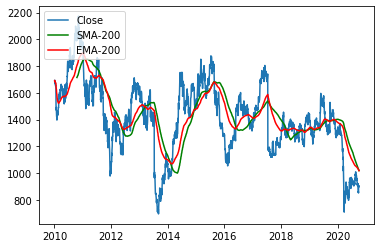

In [92]:
Lt = raw_data[raw_data.Symbol == "LT"]
plt.plot(Lt.Date, Lt['Close'], label='Close')
plt.plot(Lt.Date, Lt['SMA-200'], label='SMA-200', color='green')
plt.plot(Lt.Date, Lt['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

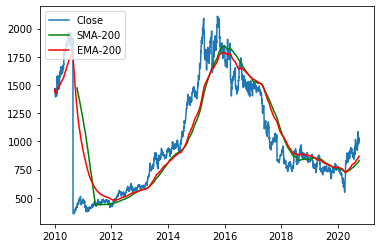

In [93]:
Lupin = raw_data[raw_data.Symbol == "LUPIN"]
plt.plot(Lupin.Date, Lupin['Close'], label='Close')
plt.plot(Lupin.Date, Lupin['SMA-200'], label='SMA-200', color='green')
plt.plot(Lupin.Date, Lupin['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

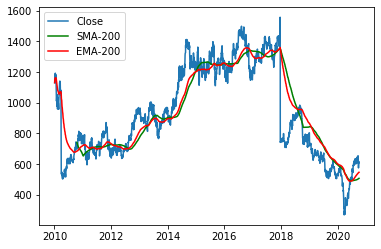

In [95]:
MM = raw_data[raw_data.Symbol == "M&M"]
plt.plot(MM.Date, MM['Close'], label='Close')
plt.plot(MM.Date, MM['SMA-200'], label='SMA-200', color='green')
plt.plot(MM.Date, MM['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

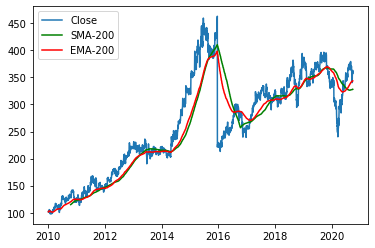

In [96]:
Marico = raw_data[raw_data.Symbol == "MARICO"]
plt.plot(Marico.Date, Marico['Close'], label='Close')
plt.plot(Marico.Date, Marico['SMA-200'], label='SMA-200', color='green')
plt.plot(Marico.Date, Marico['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

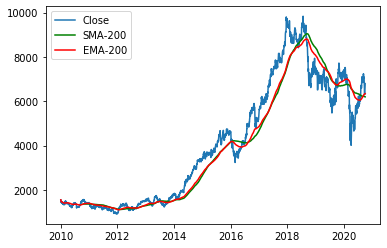

In [97]:
Maruti = raw_data[raw_data.Symbol == "MARUTI"]
plt.plot(Maruti.Date, Maruti['Close'], label='Close')
plt.plot(Maruti.Date, Maruti['SMA-200'], label='SMA-200', color='green')
plt.plot(Maruti.Date, Maruti['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

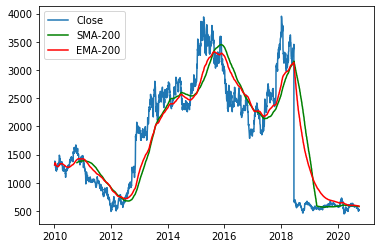

In [99]:
McDowellN = raw_data[raw_data.Symbol == "MCDOWELL-N"]
plt.plot(McDowellN.Date, McDowellN['Close'], label='Close')
plt.plot(McDowellN.Date, McDowellN['SMA-200'], label='SMA-200', color='green')
plt.plot(McDowellN.Date, McDowellN['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

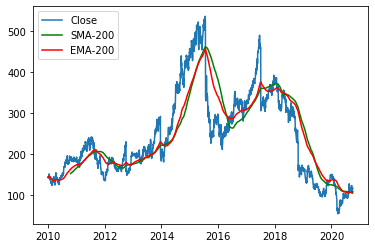

In [100]:
MotherSumi = raw_data[raw_data.Symbol == "MOTHERSUMI"]
plt.plot(MotherSumi.Date, MotherSumi['Close'], label='Close')
plt.plot(MotherSumi.Date, MotherSumi['SMA-200'], label='SMA-200', color='green')
plt.plot(MotherSumi.Date, MotherSumi['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

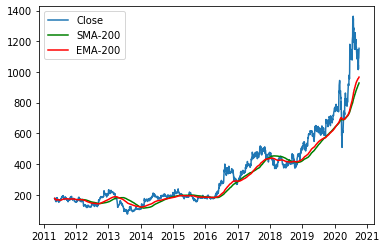

In [102]:
MuthootFin = raw_data[raw_data.Symbol == "MUTHOOTFIN"]
plt.plot(MuthootFin.Date, MuthootFin['Close'], label='Close')
plt.plot(MuthootFin.Date, MuthootFin['SMA-200'], label='SMA-200', color='green')
plt.plot(MuthootFin.Date, MuthootFin['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

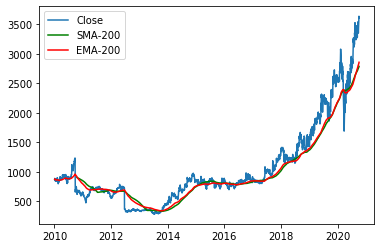

In [103]:
Naukri = raw_data[raw_data.Symbol == "NAUKRI"]
plt.plot(Naukri.Date, Naukri['Close'], label='Close')
plt.plot(Naukri.Date, Naukri['SMA-200'], label='SMA-200', color='green')
plt.plot(Naukri.Date, Naukri['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

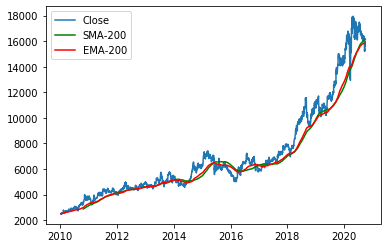

In [104]:
NestleInd = raw_data[raw_data.Symbol == "NESTLEIND"]
plt.plot(NestleInd.Date, NestleInd['Close'], label='Close')
plt.plot(NestleInd.Date, NestleInd['SMA-200'], label='SMA-200', color='green')
plt.plot(NestleInd.Date, NestleInd['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

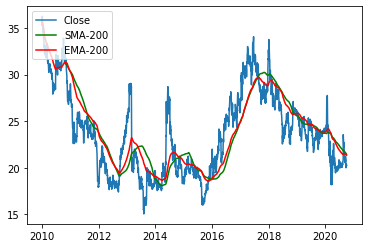

In [105]:
Nhpc = raw_data[raw_data.Symbol == "NHPC"]
plt.plot(Nhpc.Date, Nhpc['Close'], label='Close')
plt.plot(Nhpc.Date, Nhpc['SMA-200'], label='SMA-200', color='green')
plt.plot(Nhpc.Date, Nhpc['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

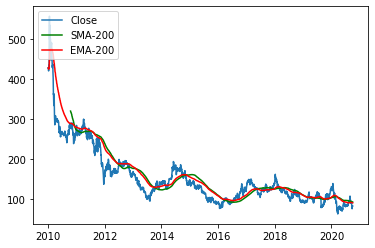

In [106]:
Nmdc = raw_data[raw_data.Symbol == "NMDC"]
plt.plot(Nmdc.Date, Nmdc['Close'], label='Close')
plt.plot(Nmdc.Date, Nmdc['SMA-200'], label='SMA-200', color='green')
plt.plot(Nmdc.Date, Nmdc['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

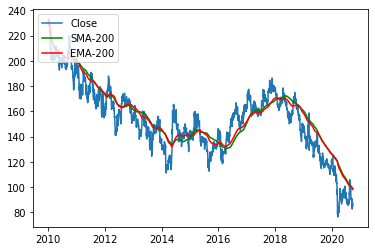

In [107]:
Ntpc = raw_data[raw_data.Symbol == "NTPC"]
plt.plot(Ntpc.Date, Ntpc['Close'], label='Close')
plt.plot(Ntpc.Date, Ntpc['SMA-200'], label='SMA-200', color='green')
plt.plot(Ntpc.Date, Ntpc['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

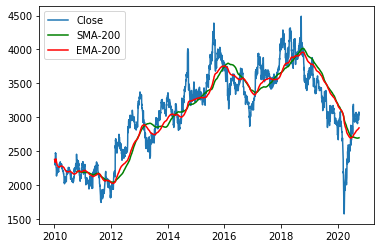

In [108]:
Ofss = raw_data[raw_data.Symbol == "OFSS"]
plt.plot(Ofss.Date, Ofss['Close'], label='Close')
plt.plot(Ofss.Date, Ofss['SMA-200'], label='SMA-200', color='green')
plt.plot(Ofss.Date, Ofss['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

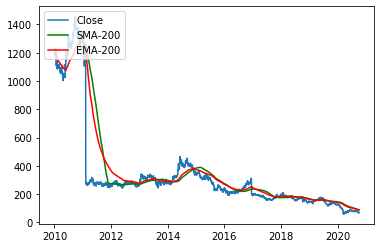

In [109]:
Ongc = raw_data[raw_data.Symbol == "ONGC"]
plt.plot(Ongc.Date, Ongc['Close'], label='Close')
plt.plot(Ongc.Date, Ongc['SMA-200'], label='SMA-200', color='green')
plt.plot(Ongc.Date, Ongc['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

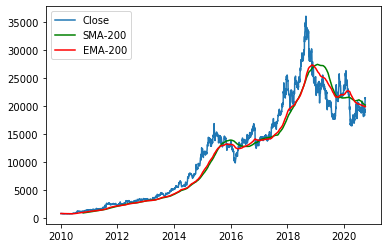

In [110]:
PageInd = raw_data[raw_data.Symbol == "PAGEIND"]
plt.plot(PageInd.Date, PageInd['Close'], label='Close')
plt.plot(PageInd.Date, PageInd['SMA-200'], label='SMA-200', color='green')
plt.plot(PageInd.Date, PageInd['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

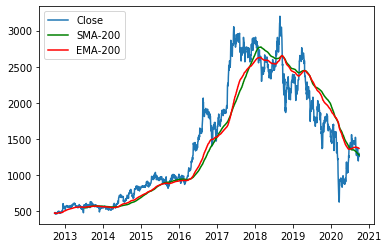

In [111]:
Pel = raw_data[raw_data.Symbol == "PEL"]
plt.plot(Pel.Date, Pel['Close'], label='Close')
plt.plot(Pel.Date, Pel['SMA-200'], label='SMA-200', color='green')
plt.plot(Pel.Date, Pel['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

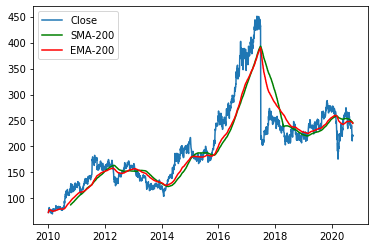

In [112]:
PetroNet = raw_data[raw_data.Symbol == "PETRONET"]
plt.plot(PetroNet.Date, PetroNet['Close'], label='Close')
plt.plot(PetroNet.Date, PetroNet['SMA-200'], label='SMA-200', color='green')
plt.plot(PetroNet.Date, PetroNet['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

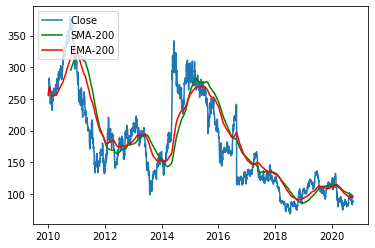

In [113]:
Pfc = raw_data[raw_data.Symbol == "PFC"]
plt.plot(Pfc.Date, Pfc['Close'], label='Close')
plt.plot(Pfc.Date, Pfc['SMA-200'], label='SMA-200', color='green')
plt.plot(Pfc.Date, Pfc['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

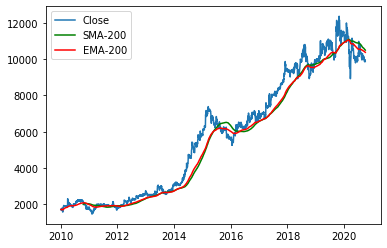

In [114]:
Pghh = raw_data[raw_data.Symbol == "PGHH"]
plt.plot(Pghh.Date, Pghh['Close'], label='Close')
plt.plot(Pghh.Date, Pghh['SMA-200'], label='SMA-200', color='green')
plt.plot(Pghh.Date, Pghh['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

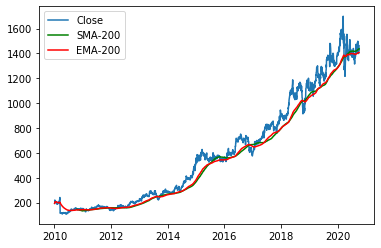

In [115]:
PidiLitInd = raw_data[raw_data.Symbol == "PIDILITIND"]
plt.plot(PidiLitInd.Date, PidiLitInd['Close'], label='Close')
plt.plot(PidiLitInd.Date, PidiLitInd['SMA-200'], label='SMA-200', color='green')
plt.plot(PidiLitInd.Date, PidiLitInd['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

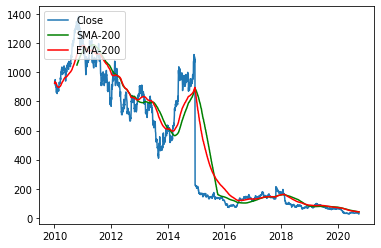

In [116]:
Pnb = raw_data[raw_data.Symbol == "PNB"]
plt.plot(Pnb.Date, Pnb['Close'], label='Close')
plt.plot(Pnb.Date, Pnb['SMA-200'], label='SMA-200', color='green')
plt.plot(Pnb.Date, Pnb['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

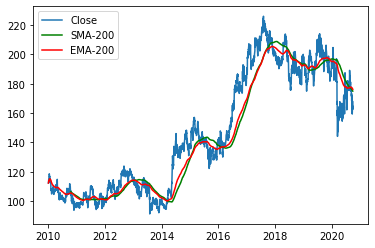

In [117]:
PowerGrid = raw_data[raw_data.Symbol == "POWERGRID"]
plt.plot(PowerGrid.Date, PowerGrid['Close'], label='Close')
plt.plot(PowerGrid.Date, PowerGrid['SMA-200'], label='SMA-200', color='green')
plt.plot(PowerGrid.Date, PowerGrid['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

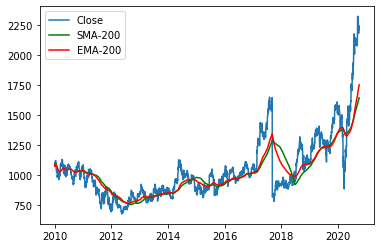

In [118]:
Reliance = raw_data[raw_data.Symbol == "RELIANCE"]
plt.plot(Reliance.Date, Reliance['Close'], label='Close')
plt.plot(Reliance.Date, Reliance['SMA-200'], label='SMA-200', color='green')
plt.plot(Reliance.Date, Reliance['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

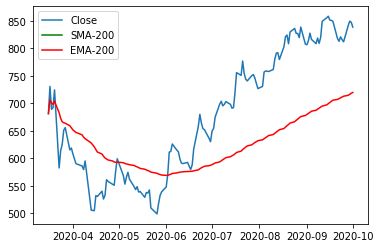

In [137]:
Sbicard = raw_data[raw_data.Symbol == "SBICARD"]
plt.plot(Sbicard.Date, Sbicard['Close'], label='Close')
plt.plot(Sbicard.Date, Sbicard['SMA-200'], label='SMA-200', color='green')
plt.plot(Sbicard.Date, Sbicard['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

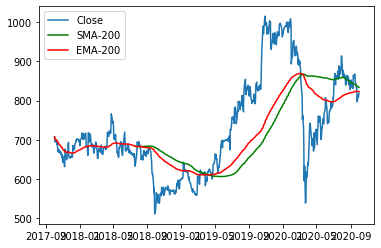

In [139]:
SbiLife = raw_data[raw_data.Symbol == "SBILIFE"]
plt.plot(SbiLife.Date, SbiLife['Close'], label='Close')
plt.plot(SbiLife.Date, SbiLife['SMA-200'], label='SMA-200', color='green')
plt.plot(SbiLife.Date, SbiLife['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

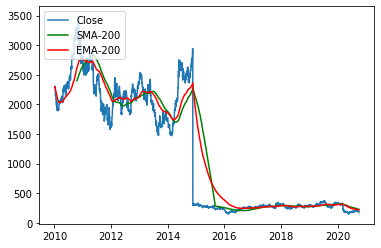

In [140]:
Sbin = raw_data[raw_data.Symbol == "SBIN"]
plt.plot(Sbin.Date, Sbin['Close'], label='Close')
plt.plot(Sbin.Date, Sbin['SMA-200'], label='SMA-200', color='green')
plt.plot(Sbin.Date, Sbin['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

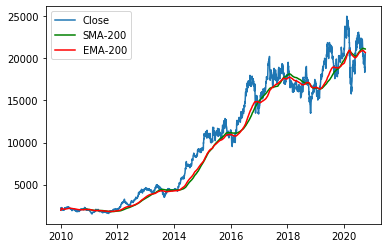

In [141]:
ShreeCem = raw_data[raw_data.Symbol == "SHREECEM"]
plt.plot(ShreeCem.Date, ShreeCem['Close'], label='Close')
plt.plot(ShreeCem.Date, ShreeCem['SMA-200'], label='SMA-200', color='green')
plt.plot(ShreeCem.Date, ShreeCem['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

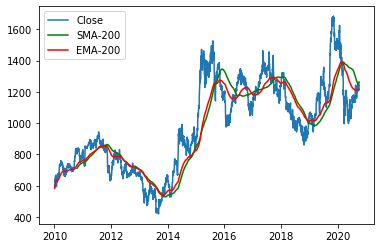

In [142]:
Siemens = raw_data[raw_data.Symbol == "SIEMENS"]
plt.plot(Siemens.Date, Siemens['Close'], label='Close')
plt.plot(Siemens.Date, Siemens['SMA-200'], label='SMA-200', color='green')
plt.plot(Siemens.Date, Siemens['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

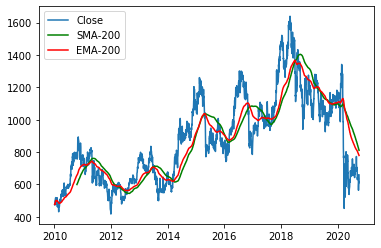

In [143]:
SRTransFin = raw_data[raw_data.Symbol == "SRTRANSFIN"]
plt.plot(SRTransFin.Date, SRTransFin['Close'], label='Close')
plt.plot(SRTransFin.Date, SRTransFin['SMA-200'], label='SMA-200', color='green')
plt.plot(SRTransFin.Date, SRTransFin['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

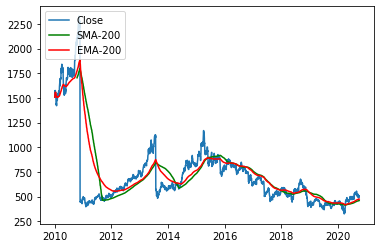

In [144]:
SunPharma = raw_data[raw_data.Symbol == "SUNPHARMA"]
plt.plot(SunPharma.Date, SunPharma['Close'], label='Close')
plt.plot(SunPharma.Date, SunPharma['SMA-200'], label='SMA-200', color='green')
plt.plot(SunPharma.Date, SunPharma['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

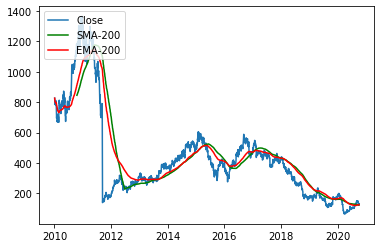

In [126]:
TataMotors = raw_data[raw_data.Symbol == "TATAMOTORS"]
plt.plot(TataMotors.Date, TataMotors['Close'], label='Close')
plt.plot(TataMotors.Date, TataMotors['SMA-200'], label='SMA-200', color='green')
plt.plot(TataMotors.Date, TataMotors['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

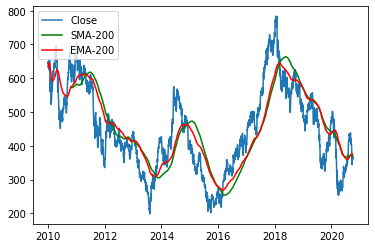

In [127]:
TataSteel = raw_data[raw_data.Symbol == "TATASTEEL"]
plt.plot(TataSteel.Date, TataSteel['Close'], label='Close')
plt.plot(TataSteel.Date, TataSteel['SMA-200'], label='SMA-200', color='green')
plt.plot(TataSteel.Date, TataSteel['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

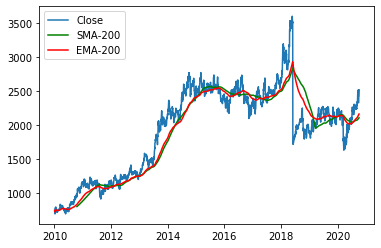

In [128]:
Tcs = raw_data[raw_data.Symbol == "TCS"]
plt.plot(Tcs.Date, Tcs['Close'], label='Close')
plt.plot(Tcs.Date, Tcs['SMA-200'], label='SMA-200', color='green')
plt.plot(Tcs.Date, Tcs['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

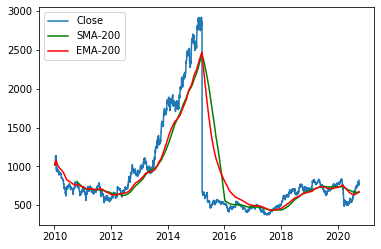

In [129]:
TechM = raw_data[raw_data.Symbol == "TECHM"]
plt.plot(TechM.Date, TechM['Close'], label='Close')
plt.plot(TechM.Date, TechM['SMA-200'], label='SMA-200', color='green')
plt.plot(TechM.Date, TechM['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

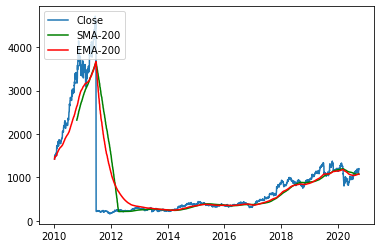

In [130]:
Titan = raw_data[raw_data.Symbol == "TITAN"]
plt.plot(Titan.Date, Titan['Close'], label='Close')
plt.plot(Titan.Date, Titan['SMA-200'], label='SMA-200', color='green')
plt.plot(Titan.Date, Titan['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

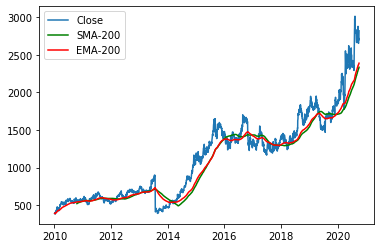

In [131]:
TorntPharm = raw_data[raw_data.Symbol == "TORNTPHARM"]
plt.plot(TorntPharm.Date, TorntPharm['Close'], label='Close')
plt.plot(TorntPharm.Date, TorntPharm['SMA-200'], label='SMA-200', color='green')
plt.plot(TorntPharm.Date, TorntPharm['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

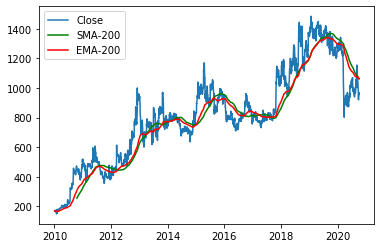

In [132]:
Ubl = raw_data[raw_data.Symbol == "UBL"]
plt.plot(Ubl.Date, Ubl['Close'], label='Close')
plt.plot(Ubl.Date, Ubl['SMA-200'], label='SMA-200', color='green')
plt.plot(Ubl.Date, Ubl['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

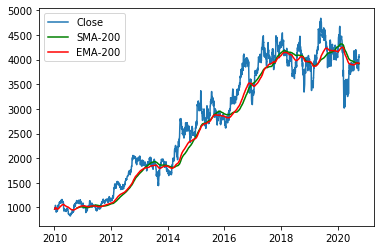

In [133]:
UltraCemCo = raw_data[raw_data.Symbol == "ULTRACEMCO"]
plt.plot(UltraCemCo.Date, UltraCemCo['Close'], label='Close')
plt.plot(UltraCemCo.Date, UltraCemCo['SMA-200'], label='SMA-200', color='green')
plt.plot(UltraCemCo.Date, UltraCemCo['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

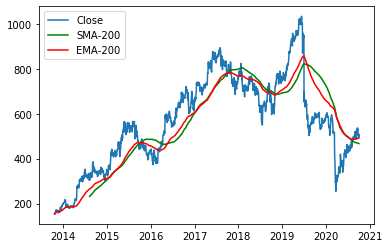

In [134]:
Upl = raw_data[raw_data.Symbol == "UPL"]
plt.plot(Upl.Date, Upl['Close'], label='Close')
plt.plot(Upl.Date, Upl['SMA-200'], label='SMA-200', color='green')
plt.plot(Upl.Date, Upl['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

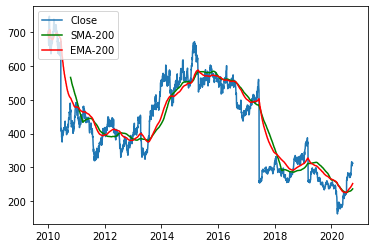

In [135]:
Wipro = raw_data[raw_data.Symbol == "WIPRO"]
plt.plot(Wipro.Date, Wipro['Close'], label='Close')
plt.plot(Wipro.Date, Wipro['SMA-200'], label='SMA-200', color='green')
plt.plot(Wipro.Date, Wipro['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()

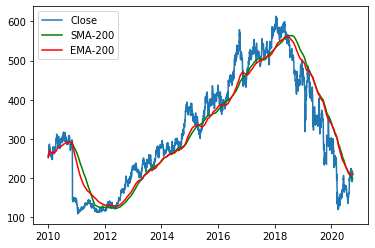

In [136]:
Zeel = raw_data[raw_data.Symbol == "ZEEL"]
plt.plot(Zeel.Date, Zeel['Close'], label='Close')
plt.plot(Zeel.Date, Zeel['SMA-200'], label='SMA-200', color='green')
plt.plot(Zeel.Date, Zeel['EMA-200'], label='EMA-200', color='red')
plt.legend(loc='upper left')
plt.show()